In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv(r'C:\Users\dhruv\OneDrive\Desktop\3rd Sem\Big Data_612\Covid-19 Project\WHO_COVID_data.csv', encoding= 'unicode_escape')
# to avoid encoding error, use 'unicode_escape'

In [3]:
df.shape

(60480, 8)

In [4]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60480 entries, 0 to 60479
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      60480 non-null  object 
 1   Country_code       60228 non-null  object 
 2   Country            60480 non-null  object 
 3   WHO_region         55944 non-null  object 
 4   New_cases          45107 non-null  float64
 5   Cumulative_cases   60480 non-null  int64  
 6   New_deaths         45246 non-null  float64
 7   Cumulative_deaths  60480 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.7+ MB


In [6]:
pd.isnull(df)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,False,False,False,False,True,False,True,False
1,False,False,False,False,True,False,True,False
2,False,False,False,False,True,False,True,False
3,False,False,False,False,True,False,True,False
4,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...
60475,False,False,False,False,False,False,False,False
60476,False,False,False,False,False,False,False,False
60477,False,False,False,False,True,False,True,False
60478,False,False,False,False,True,False,True,False


In [7]:
#check for null values
pd.isnull(df).sum()

Date_reported            0
Country_code           252
Country                  0
WHO_region            4536
New_cases            15373
Cumulative_cases         0
New_deaths           15234
Cumulative_deaths        0
dtype: int64

In [8]:
df.shape

(60480, 8)

In [9]:
# drop null values
df.dropna(inplace=True)

In [10]:
df.shape

(42655, 8)

In [11]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [12]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,4.265500e+04,4.265500e+04,42655.000000,4.265500e+04
mean,1.817525e+04,2.114138e+06,163.381339,2.325989e+04
std,2.590742e+05,8.023065e+06,938.748752,7.896832e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,1.500000e+01,8.608500e+03,0.000000,9.400000e+01
50%,2.420000e+02,9.429100e+04,2.000000,1.286000e+03
75%,3.165500e+03,8.975030e+05,32.000000,1.054850e+04
max,4.047548e+07,1.034368e+08,47687.000000,1.127152e+06


** Exploratory Data Analysis **

Date_reported

In [15]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [16]:
# Convert 'Date_reported' to datetime format for better time-based analysis
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

In [17]:
# Group data by date for aggregated trends
daily_trends = df.groupby('Date_reported')[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].sum()


In [18]:
# Plotting trends
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

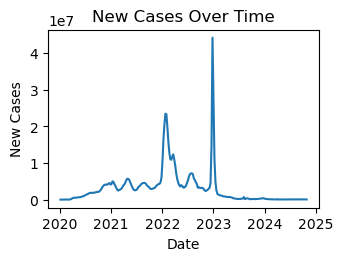

In [19]:
# Plot New Cases
plt.subplot(2, 2, 1)
sns.lineplot(data=daily_trends, x=daily_trends.index, y='New_cases')
plt.title('New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.tight_layout()
plt.show()

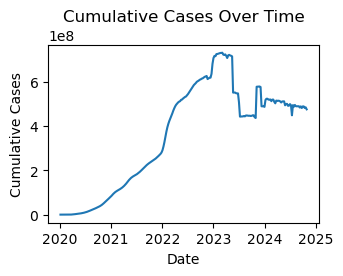

In [20]:
# Plot Cumulative Cases
plt.subplot(2, 2, 2)
sns.lineplot(data=daily_trends, x=daily_trends.index, y='Cumulative_cases')
plt.title('Cumulative Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.tight_layout()
plt.show()

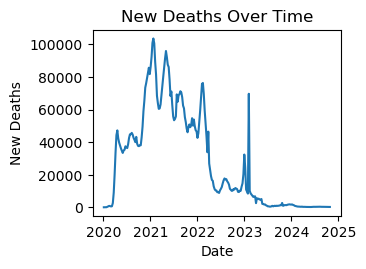

In [21]:
# Plot New Deaths
plt.subplot(2, 2, 3)
sns.lineplot(data=daily_trends, x=daily_trends.index, y='New_deaths')
plt.title('New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.tight_layout()
plt.show()

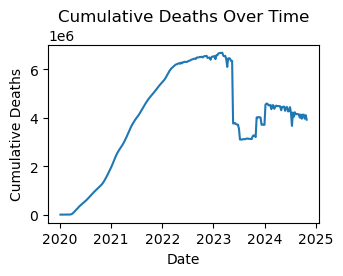

In [22]:
# Plot Cumulative Deaths
plt.subplot(2, 2, 4)
sns.lineplot(data=daily_trends, x=daily_trends.index, y='Cumulative_deaths')
plt.title('Cumulative Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.tight_layout()
plt.show()

In [23]:
# Group by date and country to analyze regional trends
regional_trends = df.groupby(['Date_reported', 'Country'])[['New_cases', 'New_deaths']].sum().reset_index()


In [24]:
# Identify Peaks and Drops for a Specific Country
country_name = 'India'  # Replace with the country you want to analyze
country_data = regional_trends[regional_trends['Country'] == country_name].set_index('Date_reported')

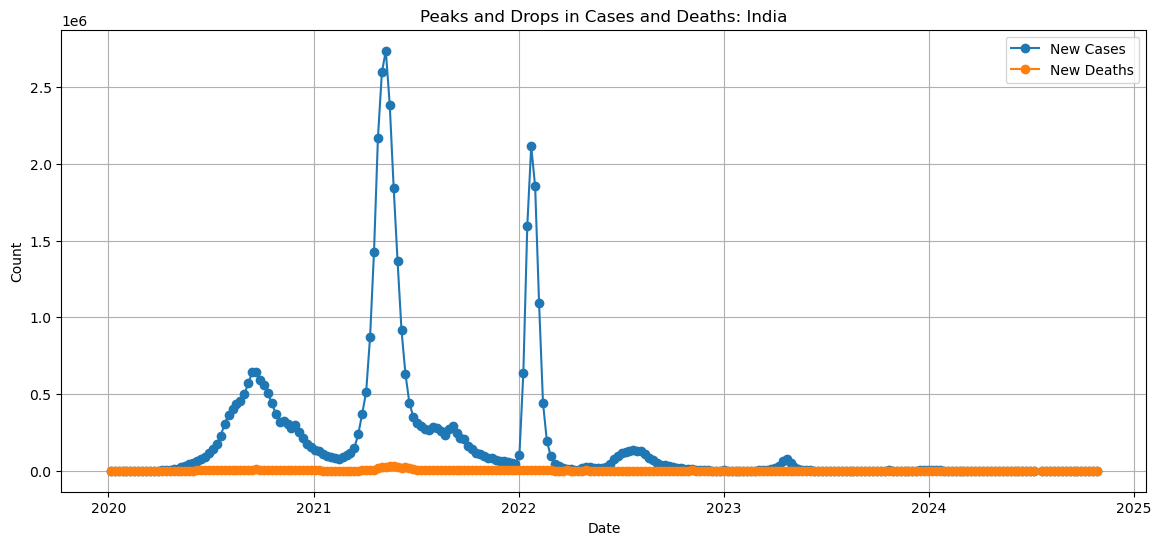

In [25]:
# Plot new cases and new deaths for the specific country
plt.figure(figsize=(14, 6))
plt.plot(country_data.index, country_data['New_cases'], label='New Cases', marker='o', linestyle='-')
plt.plot(country_data.index, country_data['New_deaths'], label='New Deaths', marker='o', linestyle='-')
plt.title(f'Peaks and Drops in Cases and Deaths: {country_name}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()

In [26]:
# Compare Trends Across Countries
top_countries = ['India', 'Brazil', 'Afghanistan']  # Replace with countries of your choice
filtered_data = regional_trends[regional_trends['Country'].isin(top_countries)]

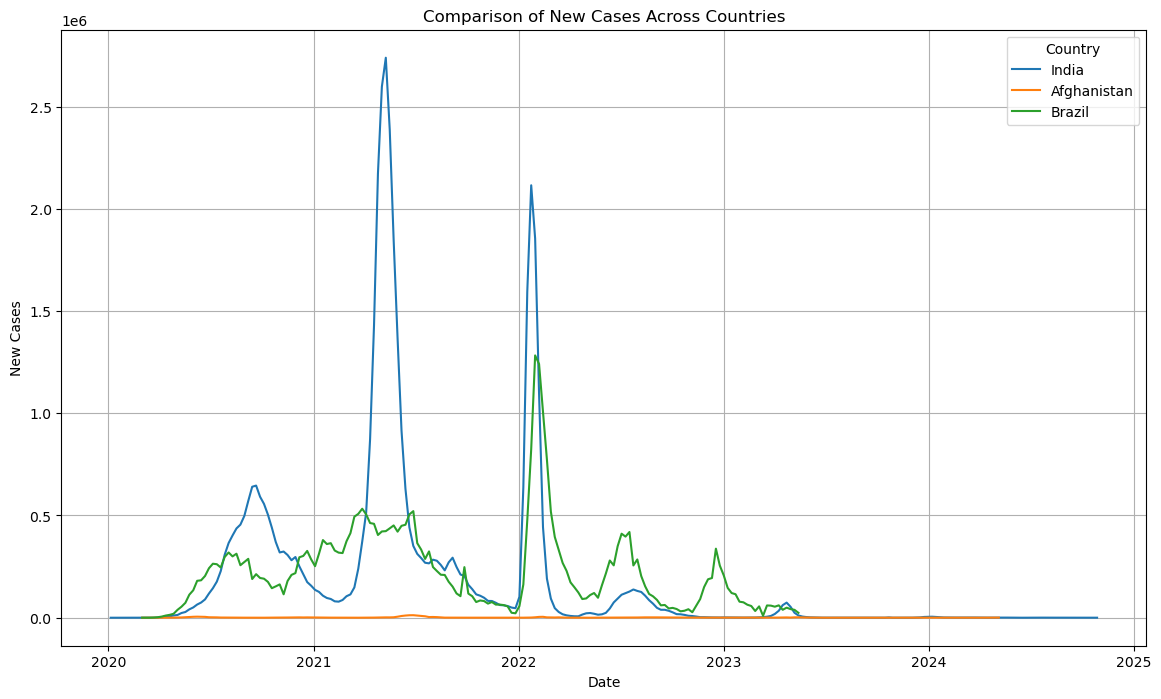

In [27]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='Date_reported', y='New_cases', hue='Country')
plt.title('Comparison of New Cases Across Countries')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Country')
plt.grid()
plt.show()

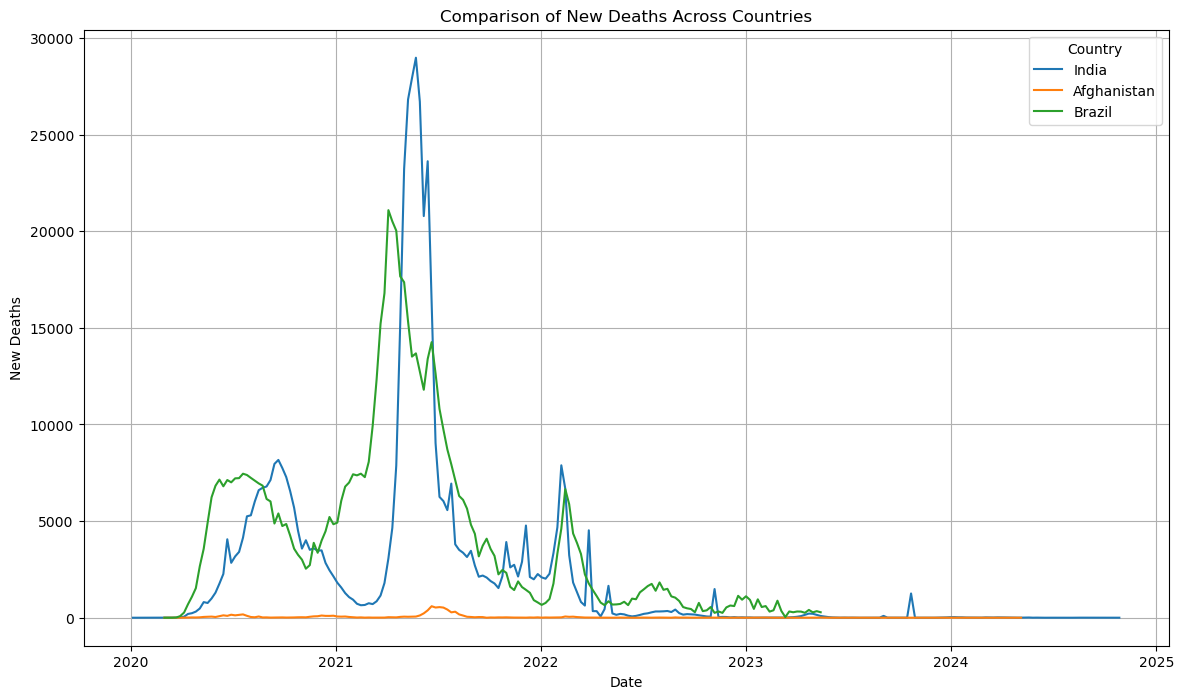

In [28]:
# Plot trends for new deaths across countries
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='Date_reported', y='New_deaths', hue='Country')
plt.title('Comparison of New Deaths Across Countries')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.legend(title='Country')
plt.grid()
plt.show()